Assingment 2 - Pontus Björklid

In [52]:
#Imports
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
import torch
from torch import autograd, nn
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader, TensorDataset

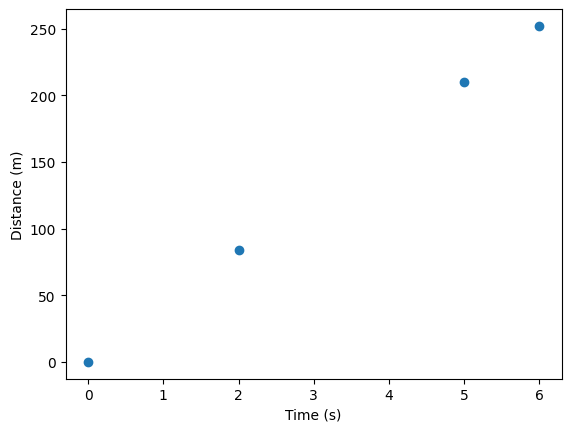

In [6]:
#2.2 Excerises
#Problem A1

t = np.array([0, 2, 5, 6])
s = np.array([0, 84, 210, 252])

plt.plot(t, s, 'o')
plt.xlabel('Time (s)')
plt.ylabel('Distance (m)')
plt.show()


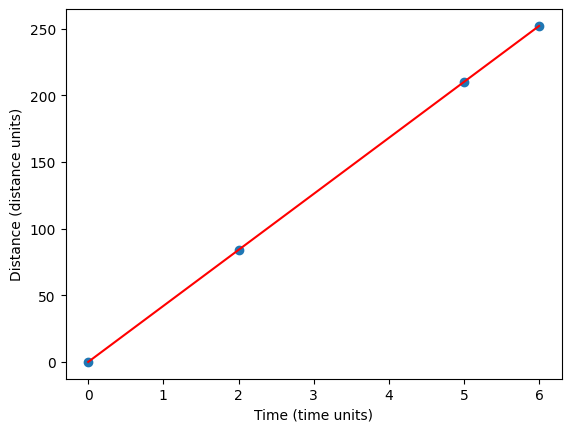

In [43]:
#2.2 Excerises
#Problem A2

t = np.array([0, 2, 5, 6])
s = np.array([0, 84, 210, 252])
v_est = 42
t_con = np.linspace(0, 6, 100)
s_est = v_est*t_con

plt.plot(t, s, 'o')
plt.plot(t_con, s_est, 'r')
plt.xlabel('Time (time units)')
plt.ylabel('Distance (distance units)')
plt.show()


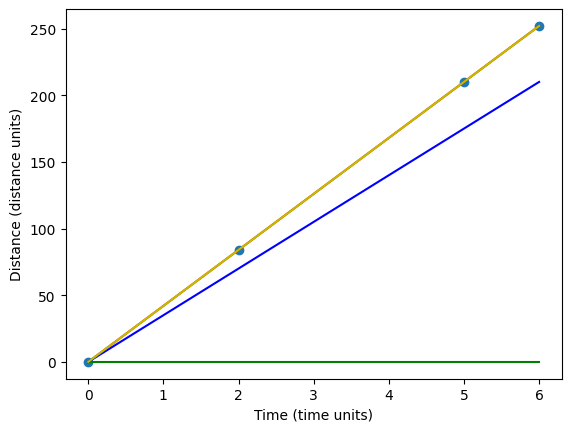

In [47]:
#2.2 Excerises
#Problem A3

t = np.array([0, 2, 5, 6])
s = np.array([0, 84, 210, 252])

v_est = 42
t_con = np.linspace(0, 6, 100)
s_est = v_est*t_con

#Trying different values for v_est
v_test_1 = 0
v_test_2 = 35
v_test_3 = 42

#Predictions
s_pred_1 = v_test_1*t
s_pred_2 = v_test_2*t
s_pred_3 = v_test_3*t

plt.plot(t, s, 'o')
plt.plot(t_con, s_est, 'r')
plt.plot(t, s_pred_1, 'g')
plt.plot(t, s_pred_2, 'b')
plt.plot(t, s_pred_3, 'y')
plt.xlabel('Time (time units)')
plt.ylabel('Distance (distance units)')
plt.show()

In [62]:
#2.2 Excerises
#Problem A4

t = np.array([0, 2, 5, 6])
s = np.array([0, 84, 210, 252])

#Different values for v_est
v_test_1 = 0
v_test_2 = 35
v_test_3 = 42

#Cost function
def cost(s, v_est, t):
    return np.sum((s - (v_est*t))**2) / len(t)
    
cost_1 = cost(s, v_test_1, t)
cost_2 = cost(s, v_test_2, t)
cost_3 = cost(s, v_test_3, t)

print('Cost for test 1:', cost_1, 'Cost for test 2:', cost_2, 'Cost for test 3:', cost_3)

Cost for test 1: 28665.0 Cost for test 2: 796.25 Cost for test 3: 0.0


Clear pattern. The cost is getting smaller for bigger v estimations.

Cost for test 1: 28665.0 Cost for test 2: 796.25 Cost for test 3: 0.0


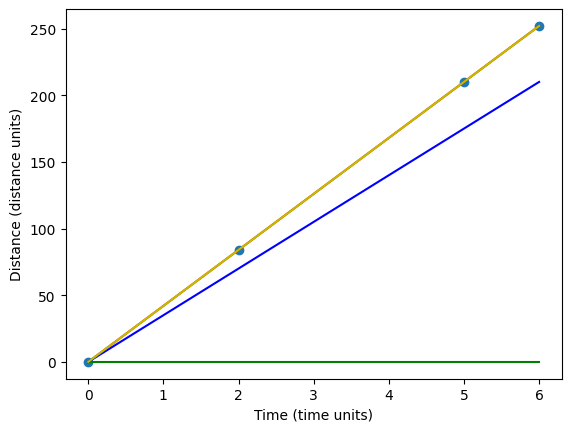

In [60]:
#2.2 Excerises
#Problem A5

#Cost function
def cost(s, v_est, t):
    return np.sum((s - (v_est*t))**2) / len(t)

#differentiating cost function
def cost_derivative(s, v_est, t):
    return np.sum(-2*t*(s - (v_est*t))) / len(t)

v: 10 cost: 16640.0
v: 20.4 cost: 7581.600000000002
v: 27.419999999999998 cost: 3454.366500000001
v: 32.1585 cost: 1573.8957365625013
v: 35.356987499999995 cost: 717.1062449712902
v: 37.5159665625 cost: 326.7315328650438
v: 38.9732774296875 cost: 148.86705466163556
v: 39.95696226503906 cost: 67.82755178020788
v: 40.62094952890136 cost: 30.903928279857347
v: 41.06914093200842 cost: 14.080602322509886


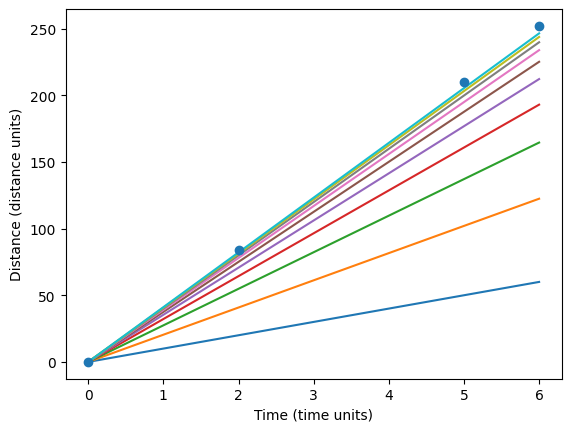

In [77]:
#2.2 Excerises
#Problem A6

#Cost function
def cost(s, v_est, t):
    return np.sum((s - (v_est*t))**2) / len(t)

#differentiating cost function
def d_cost(s, v_est, t):
    return np.sum(-2*t*(s - (v_est*t))) / len(t)

v = 10
T = 10
eta = 0.01
t = np.array([0, 2, 5, 6])
s = np.array([0, 84, 210, 252])
v_list = []

for i in range(T):
    print('v:', v, 'cost:', cost(s, v, t))
    v_list.append(v)
    plt.plot(t, v_list[i]*t)
    v = v - eta*d_cost(s, v, t)


plt.plot(t, s, 'o')
plt.xlabel('Time (time units)')
plt.ylabel('Distance (distance units)')
plt.show()

If I would continue the updatign using GD, the estimated v_hat would converge to the true v.

3 Task B

In [10]:
#3.3 B1

N = 10
a_true = 4.0
b_true = 3.0

X =  2 * np.random.rand(N, 1)
#create 1 by 10 matrix containing values between 0 and 2
y = a_true * X + b_true
X_b = np.column_stack([np.ones((N, 1)), X])
#add a column of ones to the left of X

eta = 0.1
n_iterations = 300

a0 = 1.0 
b0 = 1.0
w = np.array([[b0], [a0]])

for iteration in range(n_iterations):
    grad = 2/N * X_b.T.dot(X_b.dot(w) - y)
    w = w - eta * grad

w_from_np = w
print(w_from_np)

[[3.01227844]
 [3.98674478]]


In [13]:
#3.3 B2

N = 10
a_true = 4.0
b_true = 3.0

X =  2 * torch.randn(N, 1)
y_obs = a_true * X + b_true

def my_linear_model(X, w):
    a = w[0]
    b = w[1]
    return a*X + b

def my_12_loss_function(y_pred, y_true):
    return torch.pow(y_true - y_pred, 2)

def my_cost_function(y_pred, y_true):
    loss_over_data = my_12_loss_function(y_pred, y_true)
    return torch.mean(loss_over_data)

eta = 0.1
n_iterations = 300
w_pt = torch.randn(size=[2], requires_grad=True)

for iteration in range(n_iterations):
    y_preds = my_linear_model(X, w_pt)
    cost = my_cost_function(y_preds, y_obs)
    cost.backward()
    with torch.no_grad():
        w_pt -= eta * w_pt.grad
        w_pt.grad.zero_()
    w_pt.grad.zero_()

w_from_Pytorch = w_pt.detach().numpy()
w_from_Pytorch


array([4.       , 2.9999995], dtype=float32)

3.3 B3

They agree!

4.4 C1

Task A
- Loss function: (s - (v_est))**2
- Cost function: np.sum((s - (v_est*t))**2) / len(t)

Task B
- Loss function: torch.pow(y_true - y_pred, 2)
- Cost function: torch.mean(loss_over_data)

In [19]:
#4.4 C2

def f_abs(z):
    return torch.abs(z)

def f_squared(z):
    return torch.pow(z, 2)

def df_abs(z):
    return torch.sign(z)

def df_squared(z):
    return 2*(z)

z_sq = torch.tensor(2000.0, requires_grad=True)
z_ab = torch.tensor(2000.0, requires_grad=True)
n_iterations = 2
eta = 0.001

for i in range(n_iterations):
    print(z_sq)
    print(f_squared(z_sq))
    z_sq = z_sq - eta*df_squared(z_sq)

for i in range(n_iterations):
    print(z_ab)
    print(f_abs(z_ab))
    z_ab = z_ab - eta*df_abs(z_ab)

tensor(2000., requires_grad=True)
tensor(4000000., grad_fn=<PowBackward0>)
tensor(1996., grad_fn=<SubBackward0>)
tensor(3984016., grad_fn=<PowBackward0>)
tensor(2000., requires_grad=True)
tensor(2000., grad_fn=<AbsBackward0>)
tensor(1999.9990, grad_fn=<SubBackward0>)
tensor(1999.9990, grad_fn=<AbsBackward0>)


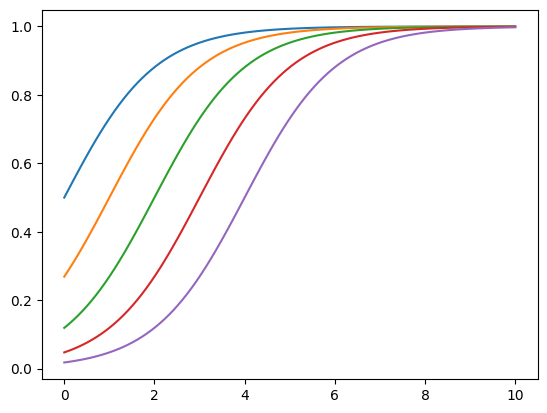

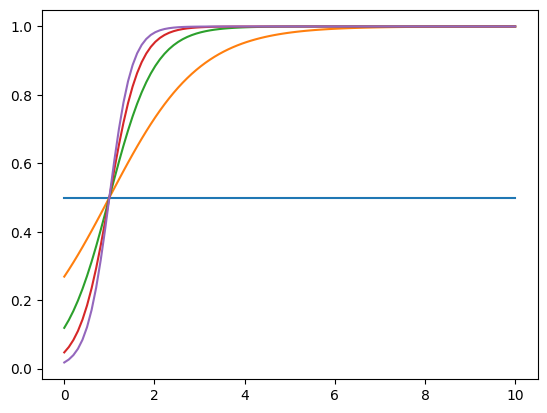

In [39]:
#5.3 D1
#a

def model(x, w, t):
    return 1 / (1 + torch.exp(-w * (x - t)))

x = torch.linspace(start = 0, end = 10, steps = 100)

n_iterations = 5

#different tao, decides where step occurs (b)
for i in range(n_iterations):
    w = torch.tensor([1.0])
    t = torch.tensor([i])
    y = model(x, w, t)
    plt.plot(x, y)
    plt.legend
plt.show()

#different w, decides steepness (b)
for i in range (n_iterations):
    w = torch.tensor([i])
    t = torch.tensor([1.0])
    y = model(x, w, t)
    plt.plot(x, y)
    plt.legend

plt.show()


D2 - a

-w*(x-t) = -wx + wt
-> a = -w
-> b = wt
w = 2, t =3
a = -2
b = 6

D3 - b

In the graph above we can see that when x is close to tao the neouron is activiated. Hence, tao effectivly decides when a neuron is on or off and creates a threshold for when activation can occur.

D3 - c

So, the term "bias" is used because it describes how this parameter biases the neuron's decision-making process, allowing it to adapt and respond to inputs in a more flexible and nuanced manner. It's an integral part of the neuron's ability to learn and make decisions in artificial neural networks.

D4 - d 



    <br>        -(w1*w)->sig(b1+w1*x)-u1*sig(b1+w1*x)-> jj <br>
input x                                          ->sig(u1*sig(b1+w1*x)+ u2*sig(b2+w2*x)+b0) <br>
        -(w2*w)->sig(b2+w2*x)-u2*sig(b2+w2*x)-> <br>

Task E 

Converged after 3 iterations.
Final parameter values for w:  w[0] = 0.8562983 w[1] = 0.0917749
Final value of cost_function:  0.0015192931266230475


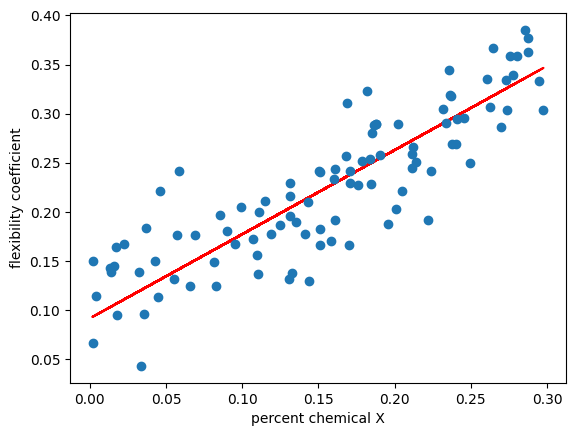

In [45]:
#6.2 E2 a

#read data set
my_data = genfromtxt('dataset_SteelAI.csv', delimiter=',', skip_header=1)

#create tensors from data set
X = torch.tensor(my_data[:,0], requires_grad=False)
y_true = torch.tensor(my_data[:,1], requires_grad=False)

#define linear model
def model(x, w):
    return w[0]*x + w[1]

#define loss function
def loss_function(y_pred, y_true):
    return (torch.pow(y_pred - y_true, 2))

#define cost function
def cost_function(y_pred, y_true):
    return torch.mean(loss_function(y_pred, y_true))

#initial guess for w
w = torch.tensor([1.0, 1.0], requires_grad=True)

#learning rate, number of iterations and convergence threshold
max_iterations = 100
eta = 0.5
convergence_threshold = 1e-6

#gradient descent
for i in range(max_iterations):
    y_pred = model(X, w)
    cost = cost_function(y_pred, y_true)
    cost.backward()
    if abs(cost - prev_cost) < convergence_threshold:
        print(f"Converged after {i} iterations.")
        break
    with torch.no_grad():
        w -= eta * w.grad
    w.grad.zero_()
    prev_cost = cost

# Check if the maximum number of iterations was reached
if i == max_iterations - 1:
    print("Maximum number of iterations reached without convergence.")

#Answer to 6.2 E2 c
w_from_Pytorch = w.detach().numpy()
print("Final parameter values for w: ", "w[0] =", w_from_Pytorch[0],"w[1] =" ,w_from_Pytorch[1])
print("Final value of cost_function: ", cost_function(model(X, w_from_Pytorch), y_true).detach().numpy())

plt.plot(X, model(X, w_from_Pytorch), 'r')
plt.plot(X, y_true, 'o')
plt.xlabel('percent chemical X')
plt.ylabel('flexibility coefficient')
plt.show()


6.2 E2 

The stopping criteria that I choosed was "Max iterations" and "Convergens threshold":

They were picked since complement eachother quite well.

If the model does not converge then the "max iterations" will stop the code when it reaches the predetermined limit. If the change in the cost function falls below the choosen threshold, the training will stop before the max number of iteration is reached. The threshold is the minumum differnece we want to see between to iterations of the cost function to deem that it is still learning.  

6.2 E2 c

Final parameter values for w:  w[0] = 0.8562983 w[1] = 0.0917749
Final value of cost_function:  0.0015192931266230475

Obs! Model: w[0]*x + w[1]

8 Task G

In [51]:
inputs = np.random.rand(3, 2)
targets = np.random.rand(3, 1)

inputs_tch = torch.FloatTensor(inputs)
targets_tch = torch.FloatTensor(targets)

print(inputs_tch)
print(targets_tch)

torch_dataset = TensorDataset(inputs_tch, targets_tch)
print("Content of torch_dataset= ", vars(torch_dataset))

tuble_of_tensors = torch_dataset.tensors
print("tuble of tensors= ", tuble_of_tensors)
list_of_tensors = list(torch_dataset.tensors)
print("list of tensors= ", list_of_tensors)

train_load = DataLoader(torch_dataset, batch_size=2, shuffle=True)

for x, t in train_load:
    print("x= ", x)
    print("t= ", t)

tensor([[0.4356, 0.9335],
        [0.8688, 0.8323],
        [0.8349, 0.8948]])
tensor([[0.7816],
        [0.0900],
        [0.8373]])
Content of torch_dataset=  {'tensors': (tensor([[0.4356, 0.9335],
        [0.8688, 0.8323],
        [0.8349, 0.8948]]), tensor([[0.7816],
        [0.0900],
        [0.8373]]))}
tuble of tensors=  (tensor([[0.4356, 0.9335],
        [0.8688, 0.8323],
        [0.8349, 0.8948]]), tensor([[0.7816],
        [0.0900],
        [0.8373]]))
list of tensors=  [tensor([[0.4356, 0.9335],
        [0.8688, 0.8323],
        [0.8349, 0.8948]]), tensor([[0.7816],
        [0.0900],
        [0.8373]])]
x=  tensor([[0.8349, 0.8948],
        [0.4356, 0.9335]])
t=  tensor([[0.8373],
        [0.7816]])
x=  tensor([[0.8688, 0.8323]])
t=  tensor([[0.0900]])


In [57]:
#8.5 G1

a_true = 4.0
b_true = 3.0
sigma_epsilon = 6.0

X = np.random.uniform(0, 10, 250)
y_obs = a_true * X + b_true + sigma_epsilon*np.random.randn(len(X))

X = torch.tensor(X).reshape(len(X), 1).float()
y_obs = torch.tensor(y_obs).reshape(len(y_obs), 1).float()


In [58]:
#8.5 G2

a_true = 4.0
b_true = 3.0
sigma_epsilon = 6.0

X = np.random.uniform(0, 10, 250)
y_obs = a_true * X + b_true + sigma_epsilon*np.random.randn(len(X))

X = torch.tensor(X).reshape(len(X), 1).float()
y_obs = torch.tensor(y_obs).reshape(len(y_obs), 1).float()

train_dataset = TensorDataset(torch.tensor(X), torch.tensor(y_obs))
my_dataloader = DataLoader(train_dataset, batch_size=10, shuffle=True)


C:\Users\pontu\AppData\Local\Temp\ipykernel_17688\1679735148.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_dataset = TensorDataset(torch.tensor(X), torch.tensor(y_obs))


In [ ]:
#8.5 G3

a_true = 4.0
b_true = 3.0
sigma_epsilon = 6.0

X = np.random.uniform(0, 10, 250)
y_obs = a_true * X + b_true + sigma_epsilon*np.random.randn(len(X))

X = torch.tensor(X).reshape(len(X), 1).float()
y_obs = torch.tensor(y_obs).reshape(len(y_obs), 1).float()

train_dataset = TensorDataset(torch.tensor(X), torch.tensor(y_obs))
my_dataloader = DataLoader(train_dataset, batch_size=10, shuffle=True)

model = nn.Sequential(
    nn.Linear(in_features= 1, out_features= 1)
)



In [ ]:
#8.5 G4

a_true = 4.0
b_true = 3.0
sigma_epsilon = 6.0

X = np.random.uniform(0, 10, 250)
y_obs = a_true * X + b_true + sigma_epsilon*np.random.randn(len(X))

X = torch.tensor(X).reshape(len(X), 1).float()
y_obs = torch.tensor(y_obs).reshape(len(y_obs), 1).float()

train_dataset = TensorDataset(torch.tensor(X), torch.tensor(y_obs))
my_dataloader = DataLoader(train_dataset, batch_size=10, shuffle=True)

model = nn.Sequential(
    nn.Linear(in_features= 1, out_features= 1)
)

cost_function = nn.MSELoss()
#cost_function = nn.L1Loss()

In [59]:
#8.5 G5

a_true = 4.0
b_true = 3.0
sigma_epsilon = 6.0

X = np.random.uniform(0, 10, 250)
y_obs = a_true * X + b_true + sigma_epsilon*np.random.randn(len(X))

X = torch.tensor(X).reshape(len(X), 1).float()
y_obs = torch.tensor(y_obs).reshape(len(y_obs), 1).float()

train_dataset = TensorDataset(torch.tensor(X), torch.tensor(y_obs))
my_dataloader = DataLoader(train_dataset, batch_size=10, shuffle=True)

model = nn.Sequential(
    nn.Linear(in_features= 1, out_features= 1)
)

cost_function = nn.MSELoss()
#cost_function = nn.L1Loss()

optim = torch.optim.SGD(model.parameters(), lr=0.0001)

C:\Users\pontu\AppData\Local\Temp\ipykernel_17688\2270113842.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_dataset = TensorDataset(torch.tensor(X), torch.tensor(y_obs))


C:\Users\pontu\AppData\Local\Temp\ipykernel_17688\2474870186.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_dataset = TensorDataset(torch.tensor(X), torch.tensor(y_obs))


Final value of cost_function:  22.959805


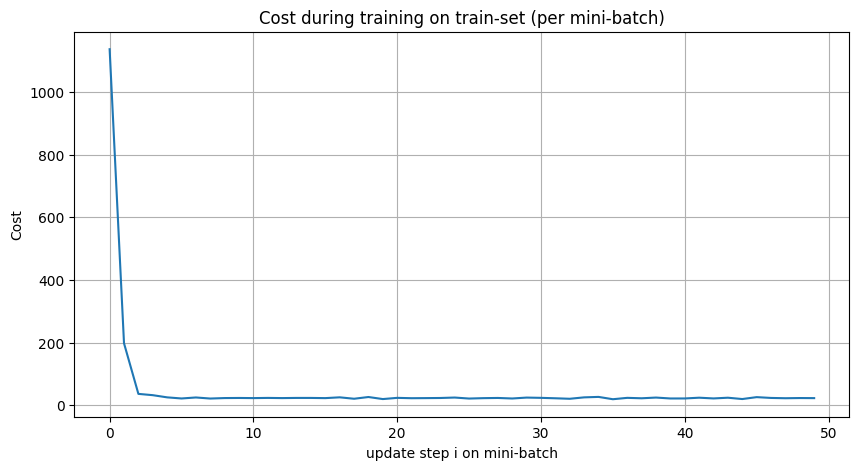

In [82]:
#8.5 G6

a_true = 5.0
b_true = 3.0
sigma_epsilon = 5.0

X = np.random.uniform(0, 10, 250)
y_obs = a_true * X + b_true + sigma_epsilon*np.random.randn(len(X))

X = torch.tensor(X).reshape(len(X), 1).float()
y_obs = torch.tensor(y_obs).reshape(len(y_obs), 1).float()

train_dataset = TensorDataset(torch.tensor(X), torch.tensor(y_obs))
my_dataloader = DataLoader(train_dataset, batch_size=125, shuffle=True)

model = nn.Sequential(
    nn.Linear(in_features= 1, out_features= 1)
)

cost_function = nn.MSELoss()
#cost_function = nn.L1Loss()

optim = torch.optim.SGD(model.parameters(), lr=0.01)

n_epochs = 25
training_minibatch_Js = []

for epoch_i in range(n_epochs):

    for X_batch, y_batch in my_dataloader:
        y_pred = model(X_batch)
        cost = cost_function(y_pred, y_batch)
        optim.zero_grad()
        cost.backward()
        optim.step()
        training_minibatch_Js.append(cost.item())


print("Final value of cost_function: ", cost_function(model(X), y_obs).detach().numpy())
plt.figure(figsize=(10, 5))
plt.plot(training_minibatch_Js)
plt.xlabel('update step i on mini-batch')
plt.ylabel('Cost')
plt.title("Cost during training on train-set (per mini-batch)")
plt.grid()

C:\Users\pontu\AppData\Local\Temp\ipykernel_17688\513404008.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_dataset = TensorDataset(torch.tensor(X), torch.tensor(y_obs))


Final value of cost_function:  26.793211


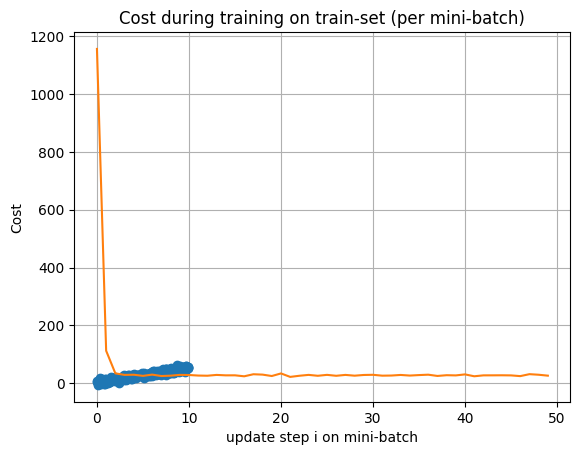

In [87]:
#8.5 G7

a_true = 5.0
b_true = 3.0
sigma_epsilon = 5.0

X = np.random.uniform(0, 10, 250)
y_obs = a_true * X + b_true + sigma_epsilon*np.random.randn(len(X))

X = torch.tensor(X).reshape(len(X), 1).float()
y_obs = torch.tensor(y_obs).reshape(len(y_obs), 1).float()

train_dataset = TensorDataset(torch.tensor(X), torch.tensor(y_obs))
my_dataloader = DataLoader(train_dataset, batch_size=125, shuffle=True)

model = nn.Sequential(
    nn.Linear(in_features= 1, out_features= 1)
)

cost_function = nn.MSELoss()
#cost_function = nn.L1Loss()

optim = torch.optim.SGD(model.parameters(), lr=0.01)

n_epochs = 25
training_minibatch_Js = []

for epoch_i in range(n_epochs):

    for X_batch, y_batch in my_dataloader:
        y_pred = model(X_batch)
        cost = cost_function(y_pred, y_batch)
        optim.zero_grad()
        cost.backward()
        optim.step()
        training_minibatch_Js.append(cost.item())


print("Final value of cost_function: ", cost_function(model(X), y_obs).detach().numpy())
#plt.figure(figsize=(10, 5))
plt.plot(X, y_obs, 'o')
plt.plot(training_minibatch_Js)
plt.xlabel('update step i on mini-batch')
plt.ylabel('Cost')
plt.title("Cost during training on train-set (per mini-batch)")
plt.grid()

C:\Users\pontu\AppData\Local\Temp\ipykernel_17688\1599722783.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_dataset = TensorDataset(torch.tensor(X), torch.tensor(y_obs))


Final value of cost_function:  25.878044
('0.weight', Parameter containing:
tensor([[5.1366]], requires_grad=True))
('0.bias', Parameter containing:
tensor([1.6577], requires_grad=True))


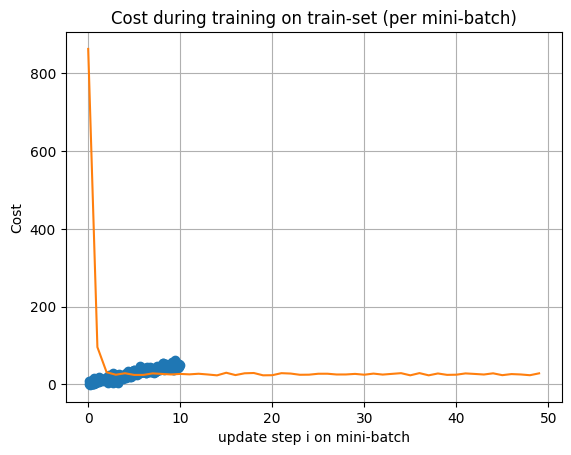

In [88]:
#8.5 G7

a_true = 5.0
b_true = 3.0
sigma_epsilon = 5.0

X = np.random.uniform(0, 10, 250)
y_obs = a_true * X + b_true + sigma_epsilon*np.random.randn(len(X))

X = torch.tensor(X).reshape(len(X), 1).float()
y_obs = torch.tensor(y_obs).reshape(len(y_obs), 1).float()

train_dataset = TensorDataset(torch.tensor(X), torch.tensor(y_obs))
my_dataloader = DataLoader(train_dataset, batch_size=125, shuffle=True)

model = nn.Sequential(
    nn.Linear(in_features= 1, out_features= 1)
)

cost_function = nn.MSELoss()
#cost_function = nn.L1Loss()

optim = torch.optim.SGD(model.parameters(), lr=0.01)

n_epochs = 25
training_minibatch_Js = []

for epoch_i in range(n_epochs):

    for X_batch, y_batch in my_dataloader:
        y_pred = model(X_batch)
        cost = cost_function(y_pred, y_batch)
        optim.zero_grad()
        cost.backward()
        optim.step()
        training_minibatch_Js.append(cost.item())


print("Final value of cost_function: ", cost_function(model(X), y_obs).detach().numpy())
for p in model.named_parameters():
    print(p)
#plt.figure(figsize=(10, 5))
plt.plot(X, y_obs, 'o')
plt.plot(training_minibatch_Js)
plt.xlabel('update step i on mini-batch')
plt.ylabel('Cost')
plt.title("Cost during training on train-set (per mini-batch)")
plt.grid()